In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# fs tools
import os

%matplotlib inline


In [3]:
df = pd.read_excel('../data.xlsx',parse_dates=['date'])
df.head(2)

,date,contest_id,word,reported_nums,hard_mode_nums,1_tries,2_tries,3_tries,4_tries,5_tries,6_tries,x_tries,freq_word,word_tail,spell_diff,relation,nvowel,smlt
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2,0.0004,0.0,0.0,2.0,1.0,1.0
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1,0.0003,0.0,0.0,4.0,1.0,1.0


In [4]:
df.shape

(359, 18)

In [5]:
df['month_of_year'] = df.date.apply(lambda x:x.month)
df['week_of_year'] = df.date.apply(lambda x:x.weekofyear)
df['day_of_week'] = df.date.apply(lambda x:x.day_of_week)
df['day_of_year'] = df.date.apply(lambda x:x.day_of_year)

In [6]:
df.iloc[31,3] = 23000
df.iloc[321,4] = 9310

In [7]:
df['hard_rate'] = df.hard_mode_nums/df.reported_nums
df['norm_minus_hard'] = df.reported_nums - df.hard_mode_nums

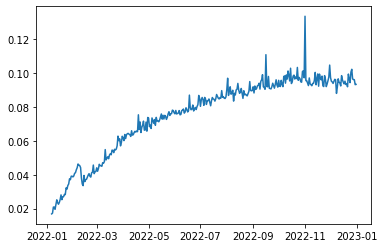

In [8]:
plt.plot(df.date,df.hard_rate)

In [9]:
df.where(df.hard_rate == max(df.hard_rate)).dropna()

,date,contest_id,word,reported_nums,hard_mode_nums,1_tries,2_tries,3_tries,4_tries,5_tries,...,spell_diff,relation,nvowel,smlt,month_of_year,week_of_year,day_of_week,day_of_year,hard_rate,norm_minus_hard


In [10]:
tot_row = len(df)
grow_rate_norm = []
grow_rate_hard = []
for i in range(tot_row-1):
    grow_rate_norm.append(df.reported_nums.iloc[i]/df.reported_nums.iloc[i+1])
    grow_rate_hard.append(df.hard_mode_nums.iloc[i]/df.hard_mode_nums.iloc[i+1])
grow_rate_hard.append(grow_rate_hard[-1])
grow_rate_norm.append(grow_rate_norm[-1])
df['grow_rate_norm'] = np.array(grow_rate_norm)
df['grow_rate_hard'] = np.array(grow_rate_hard)

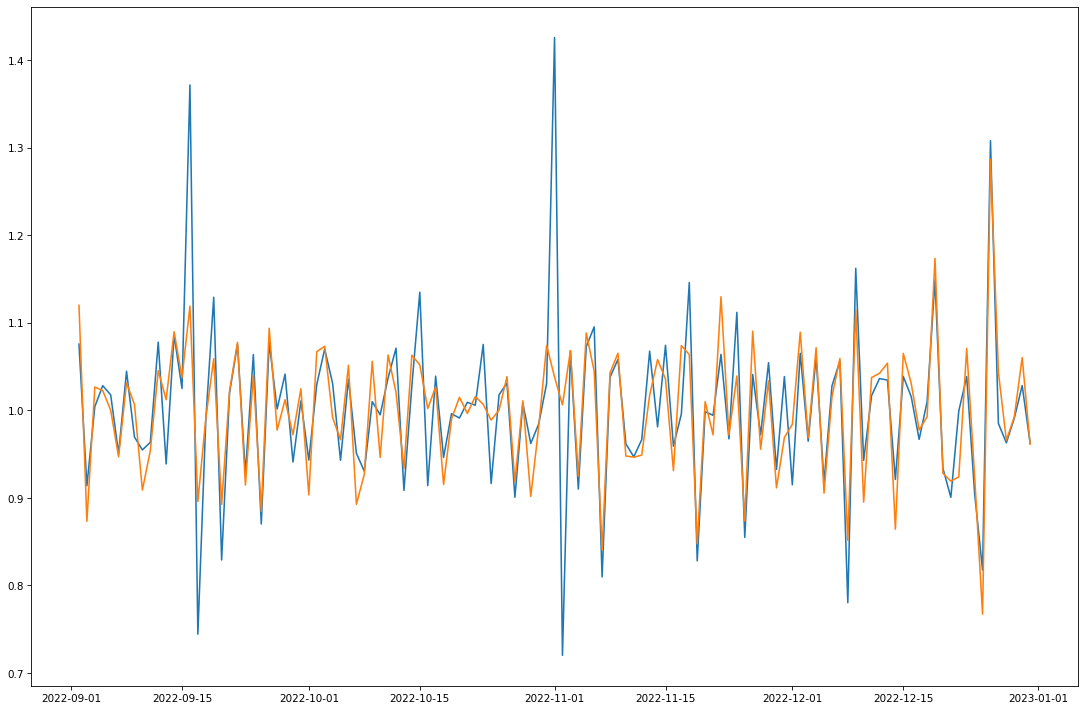

In [11]:
plt.figure(figsize=(18,12),dpi=75)
start = pd.Timestamp('2022-9-01')
df_rate_plot = df.loc[df.date>start]
plt.plot(df_rate_plot.date,df_rate_plot.grow_rate_hard)
plt.plot(df_rate_plot.date,df_rate_plot.grow_rate_norm)

In [12]:
df_rate_plot.grow_rate_norm.mean(),df_rate_plot.grow_rate_hard.mean(),df_rate_plot.grow_rate_norm.std(),df_rate_plot.grow_rate_hard.std()


(0.9992153406207209,
 1.001151734793054,
 0.07626192120757279,
 0.09877707612820431)

In [13]:
weekday_sum = df.iloc[-7:].groupby(['day_of_week'])['reported_nums'].sum()

In [14]:
weekday_sum.shape

(7,)

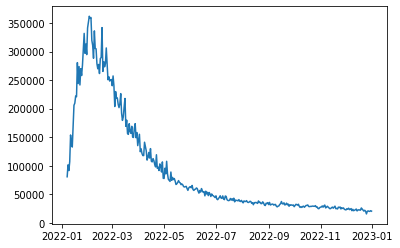

In [15]:
plt.plot(df.date,df.reported_nums)

In [16]:
monthYearAvg = df.groupby(['month_of_year'])['reported_nums'].mean()
weekYearAvg = df.groupby(['week_of_year'])['reported_nums'].mean()

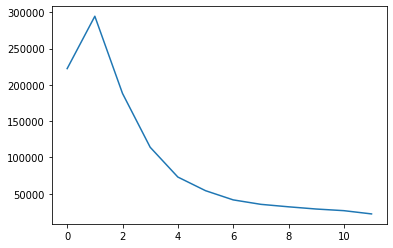

In [17]:
plt.plot(np.arange(len(monthYearAvg)),monthYearAvg)

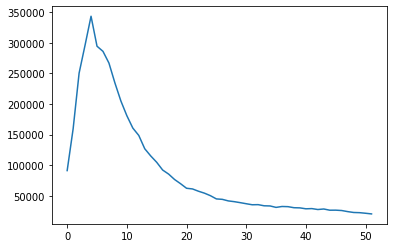

In [18]:
plt.plot(np.arange(len(weekYearAvg)),weekYearAvg)

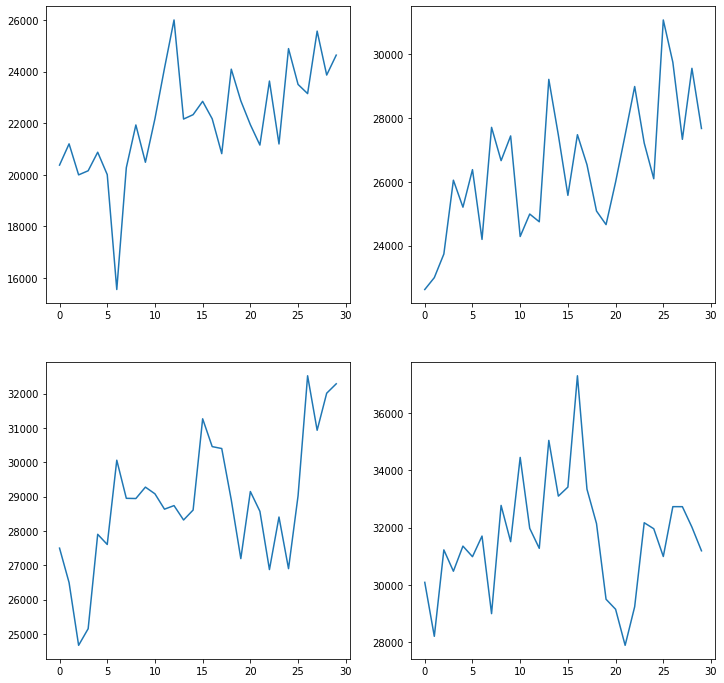

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0, 0].plot(np.arange(30), df['reported_nums'].iloc[0:30])
axs[0, 1].plot(np.arange(30), df['reported_nums'].iloc[30:60])
axs[1, 0].plot(np.arange(30), df['reported_nums'].iloc[60:90])
axs[1, 1].plot(np.arange(30), df['reported_nums'].iloc[90:120])

In [20]:
data = df.groupby(['month_of_year','day_of_week'])['reported_nums'].mean()

In [21]:
monthYearAvg

month_of_year
1     222304.400000
2     294430.571429
3     188113.677419
4     113978.800000
5      72943.451613
6      54159.833333
7      41486.903226
8      35348.548387
9      31943.200000
10     28893.677419
11     26634.400000
12     22154.225806
Name: reported_nums, dtype: float64

Text(0.5, 1.0, 'User Nums of month and weekday')

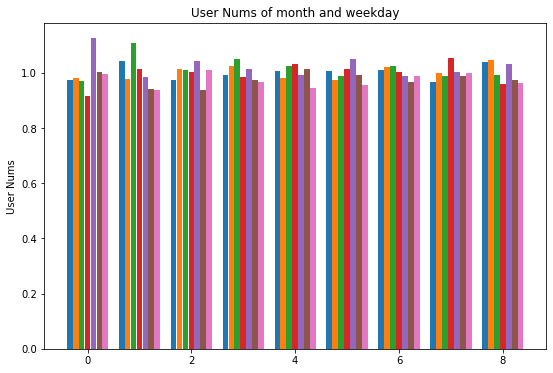

In [22]:
labels = ['Mon', 'Wnd', 'Thu', 'Tus', 'Fri','Sat'] # 级别

tot_means = []
for i in range(4,13):
    cur = []
    for j in range(0,7):
        cur.append((data.loc[i,j]/monthYearAvg.iloc[i-1]))
    tot_means.append(cur) 

tot_means = np.array(tot_means)
width = 0.8
x = np.arange(9)

# print(tot_means)
# print(x)
plt.figure(figsize=(9,6))

for i in range(7):
    # print(x+(i-3)*width/7)
    # print(tot_means[i])
    plt.bar(x+(i-3)*width/7, tot_means[:,i], 0.11)

# # 设置标签标题，图例
plt.ylabel('User Nums')
plt.title('User Nums of month and weekday')
# plt.xticks(x,labels)
# plt.legend(labels)

# # 添加注释
# def set_label(rects):
#     for rect in rects:
#         height = rect.get_height() # 获取⾼度
#         plt.text(x = rect.get_x() + rect.get_width()/2, # ⽔平坐标
#                  y = height + 0.5, # 竖直坐标
#                  s = height, # ⽂本
#                  ha = 'center') # ⽔平居中

# set_label(rects1)
# set_label(rects2)

In [23]:
# 基数项
start = pd.Timestamp('2022-12-01')
df_base = df[df.date>=start]

In [24]:
X = df_base[['1_tries','2_tries','3_tries','4_tries','5_tries','6_tries','x_tries']].values

In [25]:
modify = []
X_ = X[5]

In [26]:
def cosine_similarity(x,y):
    num = x.dot(y.T)
    denom = np.linalg.norm(x) * np.linalg.norm(y)
    return num / denom

In [27]:
for i in range(X.shape[0]):
    sim = cosine_similarity(X[i],X_)
    modify.append(df_base.hard_mode_nums.iloc[i]/sim)

In [28]:
modify

[2447.031520346725,
 2746.064886543017,
 2475.4036736749586,
 2739.0045177389547,
 2487.2383282190926,
 2042.9999999999995,
 2086.6229018965014,
 3287.1087224712915,
 2990.6172001840205,
 2461.073124725174,
 3574.081125011931,
 5231.500614418318,
 4420.319204429083,
 2923.645191964281,
 4113.0840383276545,
 2863.4847030828455,
 3131.894175165384,
 2801.269667319159,
 3701.704546024249,
 3270.4209821919017,
 2795.9820107795094,
 2927.5794599894457,
 4133.415142741375,
 2308.618897938769,
 3539.522329817953,
 2939.2339903498496,
 2385.3648603659776,
 4252.563788718675,
 3807.9430426951685,
 3481.795821521072,
 2699.837887913359]

In [29]:
# prophet
from prophet import Prophet

In [30]:
playoffs = pd.DataFrame({
     'holiday': 'playoff', 
     'ds': pd.to_datetime(
        ['2022-12-25', '2022-01-01', '2022-12-31', '2022-11-25']
        ), 'lower_window': 0, 'upper_window': 1, }) 
superbowls = pd.DataFrame({
     'holiday': 'superbowl', 
     'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']), 'lower_window': 0, 'upper_window': 1, }) 
holidays = pd.concat((playoffs, superbowls)) 
m = Prophet(holidays=holidays, holidays_prior_scale=10.0,seasonality_mode='multiplicative')
# m = Prophet()
start = pd.Timestamp('2022-01-01')
df_pre = df[['date','norm_minus_hard']].loc[df.date>start]

In [31]:
df_pre = df_pre.rename(columns={'date':'ds','norm_minus_hard':'y'})
# df_pre = df_pre.rename(columns={'date':'ds','hard_mode_nums':'y'})

# df_pre['cap']=300000

In [32]:
m.fit(df_pre)

15:18:18 - cmdstanpy - INFO - Chain [1] start processing
15:18:18 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future = m.make_future_dataframe(periods=60, freq='D')
# future['cap'] = 6
forecast = m.predict(future)

In [34]:
forecast.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,holidays,holidays_lower,holidays_upper,multiplicative_terms,...,superbowl,superbowl_lower,superbowl_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
359,2023-01-01,18413.811497,4861.719945,31231.663669,18413.811497,18413.811497,0.042369,0.042369,0.042369,0.000927,...,0.0,0.0,0.0,-0.041442,-0.041442,-0.041442,0.0,0.0,0.0,18430.878182
360,2023-01-02,18312.036672,4573.782342,31888.486941,18312.036672,18312.036672,0.000000,0.000000,0.000000,-0.022695,...,0.0,0.0,0.0,-0.022695,-0.022695,-0.022695,0.0,0.0,0.0,17896.451635
361,2023-01-03,18210.261848,5608.701926,31779.220510,18210.261848,18210.261848,0.000000,0.000000,0.000000,0.025232,...,0.0,0.0,0.0,0.025232,0.025232,0.025232,0.0,0.0,0.0,18669.752046
362,2023-01-04,18108.487023,5237.187717,33474.349355,17922.803289,18171.246780,0.000000,0.000000,0.000000,0.042989,...,0.0,0.0,0.0,0.042989,0.042989,0.042989,0.0,0.0,0.0,18886.952221
363,2023-01-05,18006.712199,5116.499960,32475.194380,17473.575015,18302.112502,0.000000,0.000000,0.000000,0.028305,...,0.0,0.0,0.0,0.028305,0.028305,0.028305,0.0,0.0,0.0,18516.387686
364,2023-01-06,17904.937374,3446.416828,32747.937702,16977.842918,18505.638382,0.000000,0.000000,0.000000,-0.003971,...,0.0,0.0,0.0,-0.003971,-0.003971,-0.003971,0.0,0.0,0.0,17833.838662
365,2023-01-07,17803.162549,3877.623226,31296.468031,16356.281781,18640.082193,0.000000,0.000000,0.000000,-0.028418,...,0.0,0.0,0.0,-0.028418,-0.028418,-0.028418,0.0,0.0,0.0,17297.224963
366,2023-01-08,17701.387725,2649.137850,30117.342766,15709.689102,18911.411961,0.000000,0.000000,0.000000,-0.041442,...,0.0,0.0,0.0,-0.041442,-0.041442,-0.041442,0.0,0.0,0.0,16967.802239
367,2023-01-09,17599.612900,2098.053848,31497.677209,14889.897687,19098.882257,0.000000,0.000000,0.000000,-0.022695,...,0.0,0.0,0.0,-0.022695,-0.022695,-0.022695,0.0,0.0,0.0,17200.196063
368,2023-01-10,17497.838076,3945.492936,32010.034426,13961.876547,19515.163089,0.000000,0.000000,0.000000,0.025232,...,0.0,0.0,0.0,0.025232,0.025232,0.025232,0.0,0.0,0.0,17939.352050


In [35]:
start = pd.Timestamp('2023-01-01')
end = pd.Timestamp('2023-3-1')
df_preds_season = forecast[['ds','trend','yhat','yhat_lower','yhat_upper']].loc[(forecast['ds']>=start) & (forecast['ds']<=end)]

In [36]:
df_preds_season['season_diff'] = df_preds_season['yhat']-df_preds_season['trend']

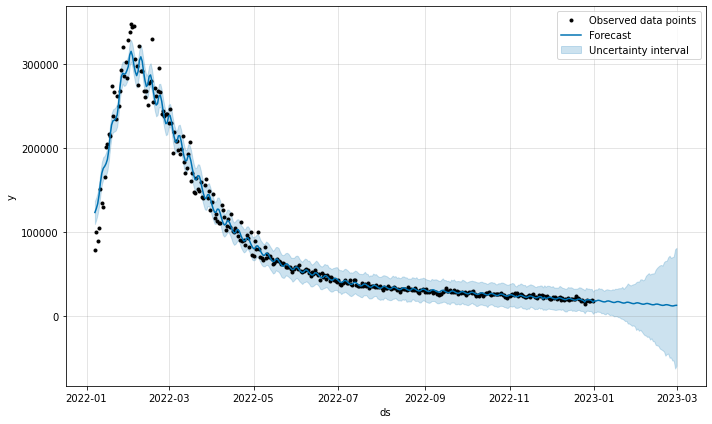

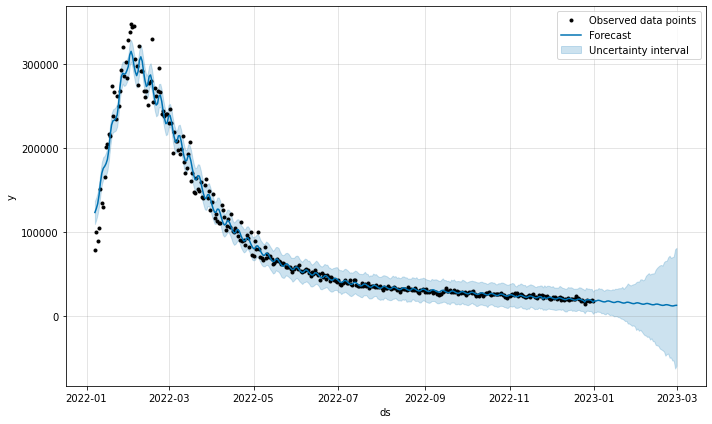

In [37]:
m.plot(forecast,include_legend=True)

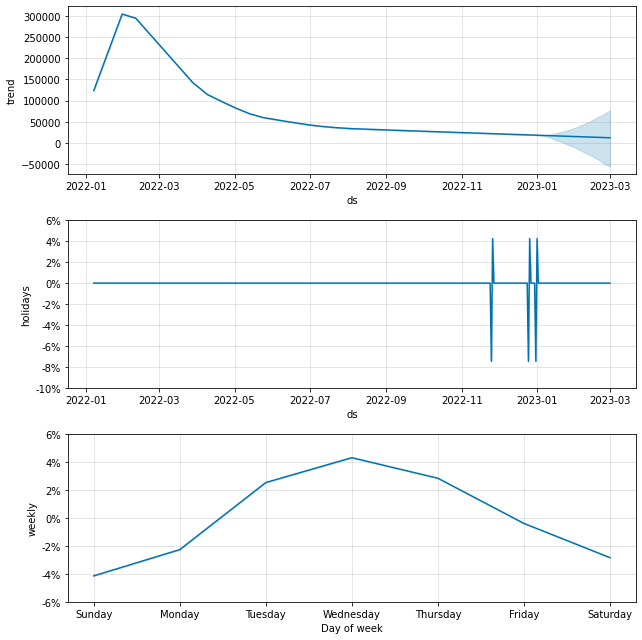

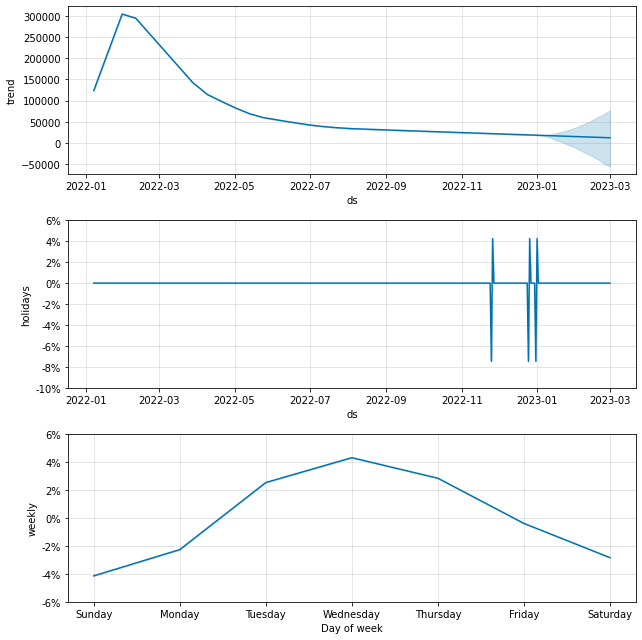

In [38]:
m.plot_components(forecast)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
start = pd.Timestamp('2022-3-1')
df_reg = df.loc[df.date>start].sort_values(['date'])
df_reg['x'] = np.arange(len(df_reg))
test_X = np.arange(len(df_reg),len(df_reg)+60)

In [40]:
model = LinearRegression()
Stand=StandardScaler()

In [41]:
train_Y = df_reg['norm_minus_hard'].values.reshape(-1,1)
# Stand.fit(train_Y)
# train_Y = Stand.transform(train_Y) 
train_X = np.arange(len(df_reg),dtype=np.float32).reshape(-1,1)

In [42]:
trans_X = np.concatenate([train_X,train_X**0.8,train_X**0.6,train_X**0.4,train_X**0.2,np.log(train_X+1)],axis=1)
test_X = test_X.reshape(-1,1)
test_X = np.concatenate([test_X,test_X**0.8,test_X**0.6,test_X**0.4,test_X**0.2,np.log(test_X+1)],axis=1)


In [43]:
trans_X[-1],test_X[0]

(array([304.       ,  96.89445  ,  30.883337 ,   9.843498 ,   3.137435 ,
          5.7203116], dtype=float32),
 array([305.        ,  97.1493438 ,  30.9442459 ,   9.85643667,
          3.13949624,   5.7235851 ]))

In [44]:
# Stand.fit(trans_X)
# trans_X = Stand.transform(trans_X)
# test_X = Stand.fit_transform(test_X) 

In [45]:
train_Y.shape, trans_X.shape

((305, 1), (305, 6))

In [46]:
model.fit(trans_X,train_Y)

LinearRegression()

In [47]:
preds=model.predict(test_X)

In [48]:
trans_X[-1],test_X[0]

(array([304.       ,  96.89445  ,  30.883337 ,   9.843498 ,   3.137435 ,
          5.7203116], dtype=float32),
 array([305.        ,  97.1493438 ,  30.9442459 ,   9.85643667,
          3.13949624,   5.7235851 ]))

In [49]:
preds

array([[20128.91239813],
       [20065.36611065],
       [20001.76616978],
       [19938.10788085],
       [19874.38662001],
       [19810.59783329],
       [19746.73703548],
       [19682.79980912],
       [19618.78180357],
       [19554.678734  ],
       [19490.48638042],
       [19426.20058672],
       [19361.81725982],
       [19297.33236868],
       [19232.74194335],
       [19168.04207427],
       [19103.22891122],
       [19038.29866254],
       [18973.24759427],
       [18908.07202935],
       [18842.76834676],
       [18777.33298077],
       [18711.76242009],
       [18646.05320714],
       [18580.20193727],
       [18514.20525803],
       [18448.05986837],
       [18381.76251797],
       [18315.31000648],
       [18248.6991829 ],
       [18181.92694475],
       [18114.99023747],
       [18047.8860538 ],
       [17980.61143296],
       [17913.16346019],
       [17845.53926592],
       [17777.73602526],
       [17709.75095736],
       [17641.58132477],
       [17573.22443287],


In [50]:
date_reported_nums = pd.date_range(start='1/1/2023',periods=60)

In [51]:
predicts_recorder_nums = pd.DataFrame({'yhat':preds.reshape(-1)},index=date_reported_nums)

In [52]:
predicts_recorder_nums.tail(1)

,yhat
2023-03-01,16162.967404


In [53]:
for i in range(len(predicts_recorder_nums)):
    predicts_recorder_nums.yhat.iloc[i] += df_preds_season.season_diff.iloc[i]+2100

In [54]:
df_preds_season

,ds,trend,yhat,yhat_lower,yhat_upper,season_diff
359,2023-01-01,18413.811497,18430.878182,4861.719945,31231.663669,17.066685
360,2023-01-02,18312.036672,17896.451635,4573.782342,31888.486941,-415.585037
361,2023-01-03,18210.261848,18669.752046,5608.701926,31779.220510,459.490198
362,2023-01-04,18108.487023,18886.952221,5237.187717,33474.349355,778.465197
363,2023-01-05,18006.712199,18516.387686,5116.499960,32475.194380,509.675487
364,2023-01-06,17904.937374,17833.838662,3446.416828,32747.937702,-71.098712
365,2023-01-07,17803.162549,17297.224963,3877.623226,31296.468031,-505.937586
366,2023-01-08,17701.387725,16967.802239,2649.137850,30117.342766,-733.585486
367,2023-01-09,17599.612900,17200.196063,2098.053848,31497.677209,-399.416838
368,2023-01-10,17497.838076,17939.352050,3945.492936,32010.034426,441.513974


In [55]:
predicts_recorder_nums

,yhat
2023-01-01,22245.979083
2023-01-02,21749.781074
2023-01-03,22561.256368
2023-01-04,22816.573078
2023-01-05,22484.062107
2023-01-06,21839.499121
2023-01-07,21340.799449
2023-01-08,21049.214323
2023-01-09,21319.364966
2023-01-10,22096.192708
